# Telecom X – Parte 2: Predicción de Cancelación (Churn)

## 1. Introducción

### 📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

In [447]:
# Mi Challenge Telecom X - Parte 1
# https://github.com/freedox-cts/challenge-telecom-x

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

### 🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

### 🧠 Objetivos del Desafío

1 - Preparar los datos para el modelado (tratamiento, codificación, normalización).

2 - Realizar análisis de correlación y selección de variables.

3 - Entrenar dos o más modelos de clasificación.

4 - Evaluar el rendimiento de los modelos con métricas.

5 - Interpretar los resultados, incluyendo la importancia de las variables.

6 - Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

### 🧰 Lo que vas a practicar

- ✅ Preprocesamiento de datos para Machine Learning
- ✅ Construcción y evaluación de modelos predictivos
- ✅ Interpretación de resultados y entrega de insights
- ✅ Comunicación técnica con enfoque estratégico

La librería principal a usar en éste estudio será la de Scikit Learn:

https://scikit-learn.org/stable/user_guide.html

## 2. 🛠️ Preparación de los Datos. (EDA)

Análisis Exploratorio de Datos (EDA)

### Importar Librerias

In [448]:
import sys
print(f'Versión de Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

Versión de Python: 3.11.13


In [449]:
import sys
import pandas as pd  # operaciones con DataFrames
import numpy as np   # operaciones matemáticas

import sklearn       # Machine Learning, Scikit-Learn
import yellowbrick   #  visualización de diagnóstico ML, extiende Scikit-Learn

import matplotlib               # crea gráficos
import matplotlib.pyplot as plt
import seaborn as sns           # crea gráficos
import plotly                   # crea gráficos
import plotly.express as px
!pip install -U kaleido==0.2.1         # guarda gráficos

print('')
print(f'Versión de Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')
print('')
print(f'Versión de Pandas: {pd.__version__}')
print(f'Versión de Numpy: {np.__version__}')
print('')
print(f'Versión de Scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de Yellowbrick: {yellowbrick.__version__}')
print('')
print(f'Versión de Matplotlib: {matplotlib.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de Plotly: {plotly.__version__}')


Versión de Python: 3.11.13

Versión de Pandas: 2.2.2
Versión de Numpy: 2.0.2

Versión de Scikit-learn (sklearn): 1.6.1
Versión de Yellowbrick: 1.5

Versión de Matplotlib: 3.10.0
Versión de seaborn: 0.13.2
Versión de Plotly: 5.24.1


In [450]:
import requests # carga datos desde URL

import warnings
warnings.filterwarnings('ignore')

Guia del Usuario de Scikit Learn:

https://scikit-learn.org/stable/user_guide.html

### Extracción del Archivo Tratado

In [451]:
# dataset internvenido del Challenge anterior Telecom X Parte 1, formato CSV
url = 'https://github.com/freedox-cts/challenge-telecom-x/raw/refs/heads/main/TelecomX_Data_intervenido.csv'

try:
    # pedir respuesta de URL
    respuesta = requests.get(url)
    respuesta.raise_for_status() # error si la solicitud HTTP no fue exitosa

    # cargar datos CSV a DataFrame
    datos = pd.read_csv(url)

except requests.exceptions.RequestException as e:
    print('¡Error de conexión!')
    print(f'Verifica conexión o enlace: {e}")')
except Exception as e:
    print('¡No se pudo cargar datos!')
    print(f'Error: {e}')

In [452]:
datos.shape

(7267, 22)

In [453]:
datos.head()

,id_cliente,cancelacion,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,...,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque por correo,65.6,593.30,2.19
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por correo,59.9,542.40,2.00
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra optica,...,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra optica,...,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra optica,...,0,1,1,0,Mensual,1,Cheque por correo,83.9,267.40,2.80


### Eliminación de Columnas Irrelevantes

Se consideran irrelevantes las columnas:
- 'id_cliente' por no influir en el estudio de ML y
- 'cuentas_diarias' por ser solo un cálculo de pago_mensual sobre una constante (/30 días).

In [454]:
datos = datos.drop(['id_cliente','cuentas_diarias'], axis=1)

Columnas 'id_clientes' y 'cuentas_diarias' eliminadas.

In [455]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancelacion             7267 non-null   int64  
 1   genero                  7267 non-null   object 
 2   mayor_65                7267 non-null   int64  
 3   pareja                  7267 non-null   int64  
 4   dependientes            7267 non-null   int64  
 5   antiguedad              7267 non-null   int64  
 6   serv_telefonico         7267 non-null   int64  
 7   multip_lineas           7267 non-null   int64  
 8   serv_internet           7267 non-null   object 
 9   seguridad_online        7267 non-null   int64  
 10  respaldo_online         7267 non-null   int64  
 11  proteccion_dispositivo  7267 non-null   int64  
 12  serv_tecnico            7267 non-null   int64  
 13  tv_streaming            7267 non-null   int64  
 14  peliculas_streaming     7267 non-null   

### Variables

#### Variables Numéricas o Cuantitativas

In [456]:
datos.describe()

,cancelacion,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [457]:
# listado de variables numéricas
var_numericas = datos.select_dtypes(include=np.number).columns.tolist()
var_numericas

['cancelacion',
 'mayor_65',
 'pareja',
 'dependientes',
 'antiguedad',
 'serv_telefonico',
 'multip_lineas',
 'seguridad_online',
 'respaldo_online',
 'proteccion_dispositivo',
 'serv_tecnico',
 'tv_streaming',
 'peliculas_streaming',
 'boleta_electronica',
 'pago_mensual',
 'pago_total']

In [458]:
# cantidad de variables numéricas
num_vars = len(datos.select_dtypes(include=np.number).columns)

In [459]:
# remover la variable comparación
var_numericas.remove('cancelacion')

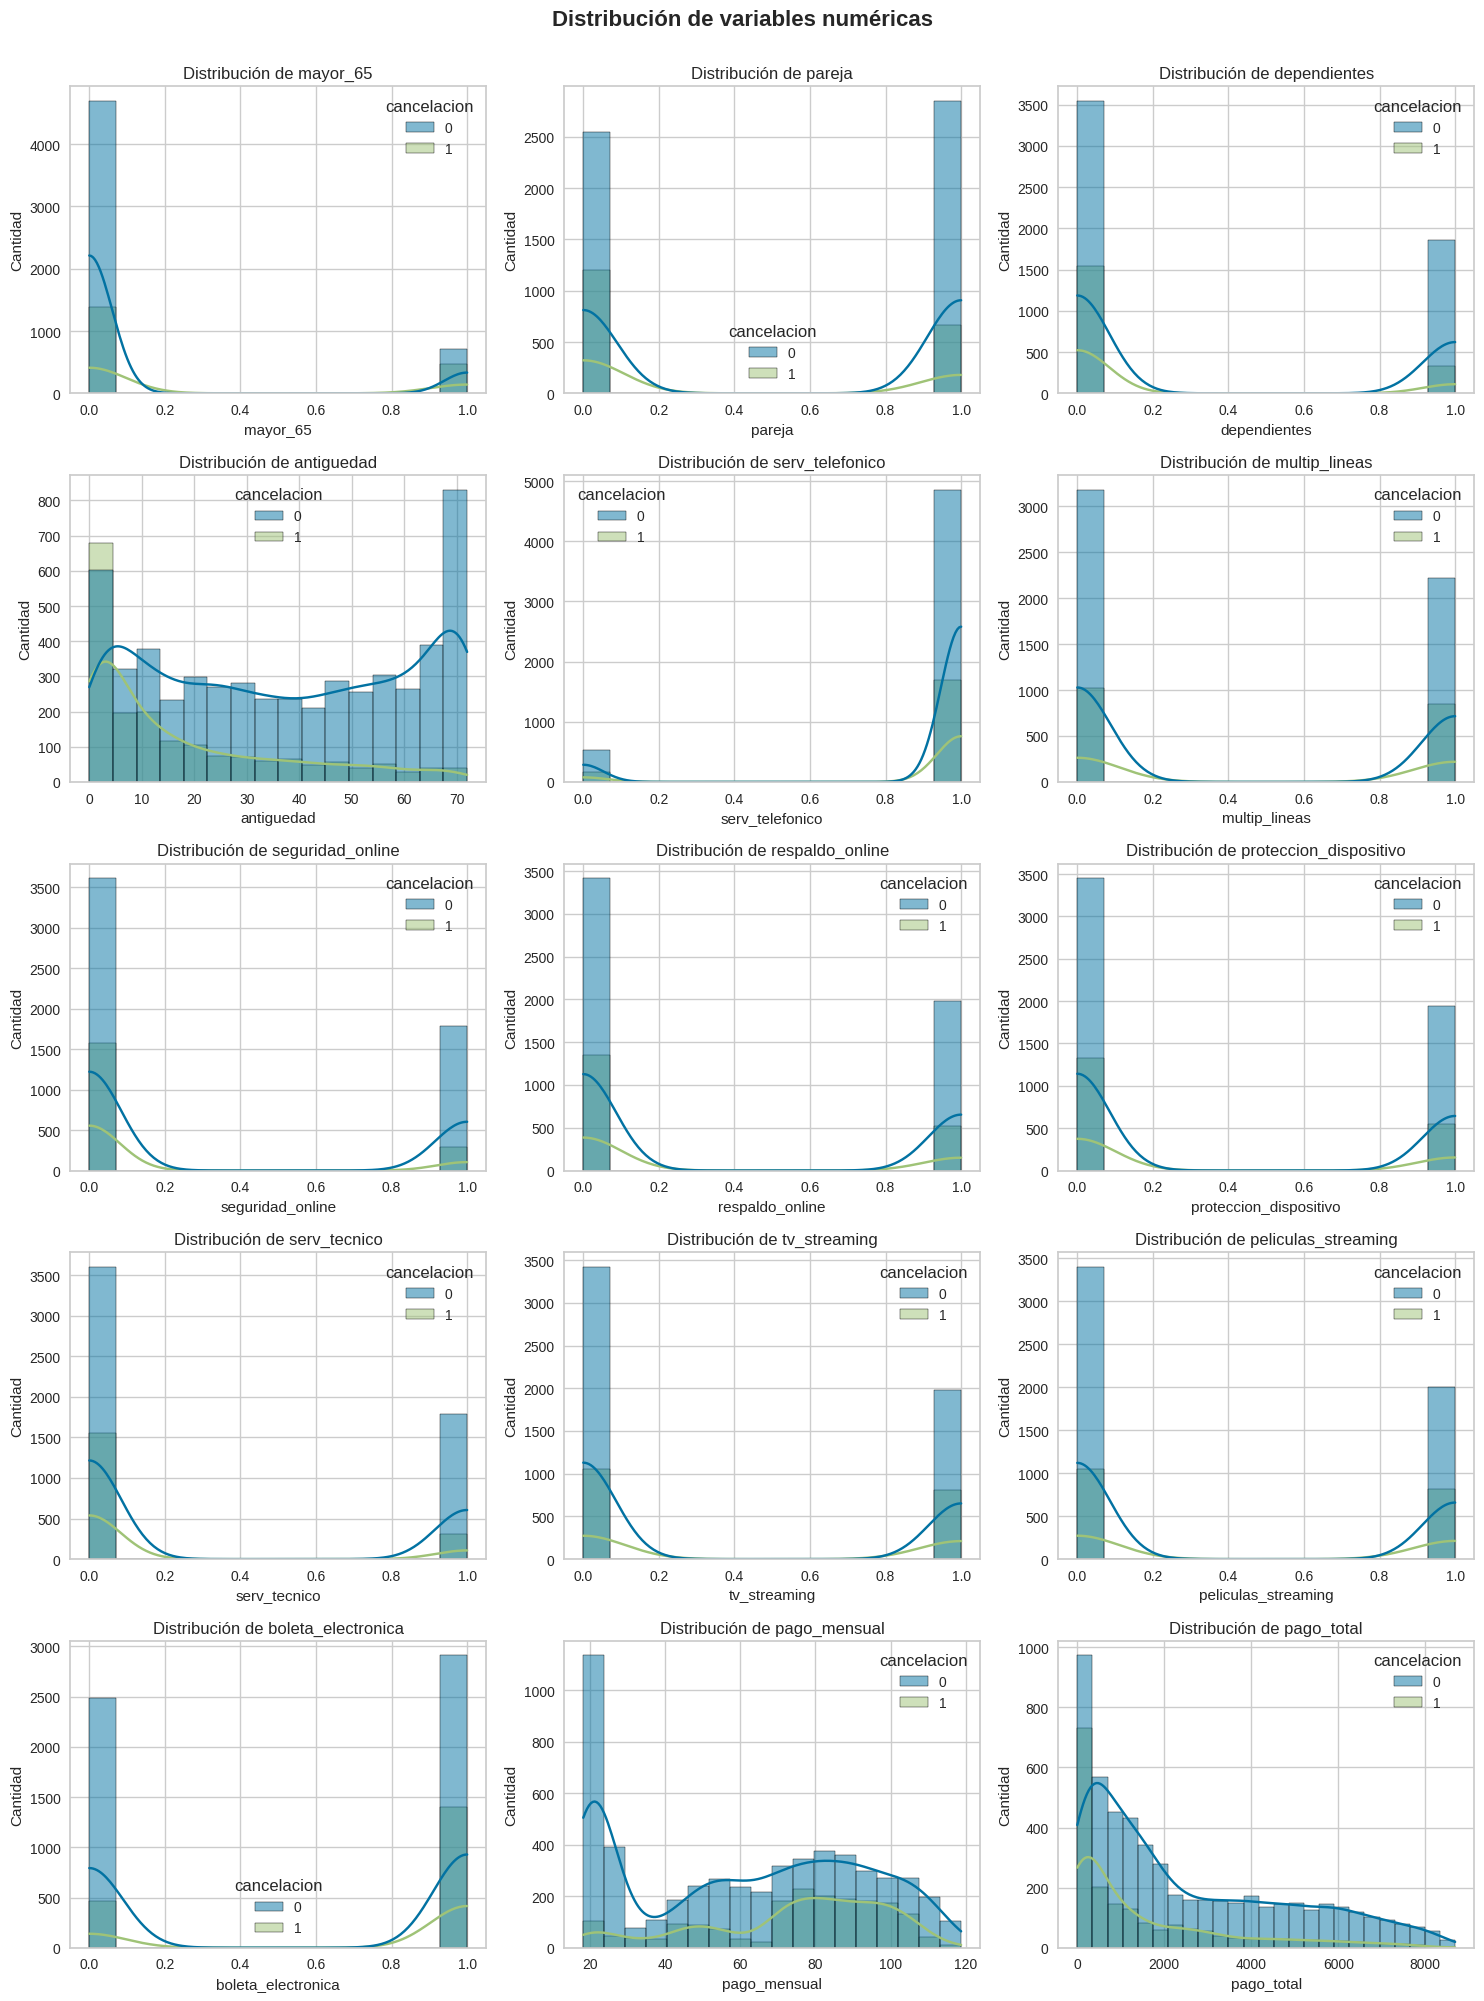

In [460]:
# filas y columnas para los subplots
n_cols = 3
n_rows = (num_vars-1 + n_cols - 2) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Distribución de variables numéricas', y=1 ,fontsize=16, weight='bold')

for i, var in enumerate(var_numericas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=datos, x=var, hue='cancelacion', kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')

plt.tight_layout()
plt.savefig('1-cancelacionesVSnumericas.png', format='png', bbox_inches='tight')
plt.show()

#### Variables Categóricas o Cualitativas

In [461]:
datos.describe(include='object')

,genero,serv_internet,contrato,metodo_pago
count,7267,7267,7267,7267
unique,2,3,3,4
top,Masculino,Fibra optica,Mensual,Cheque electrónico
freq,3675,3198,4005,2445


In [462]:
# listado de variables categóricas
var_categoricas = datos.select_dtypes(include='object').columns.tolist()
var_categoricas

['genero', 'serv_internet', 'contrato', 'metodo_pago']

In [463]:
# cantidad de variables categóricas
num_vars_cat = len(var_categoricas)

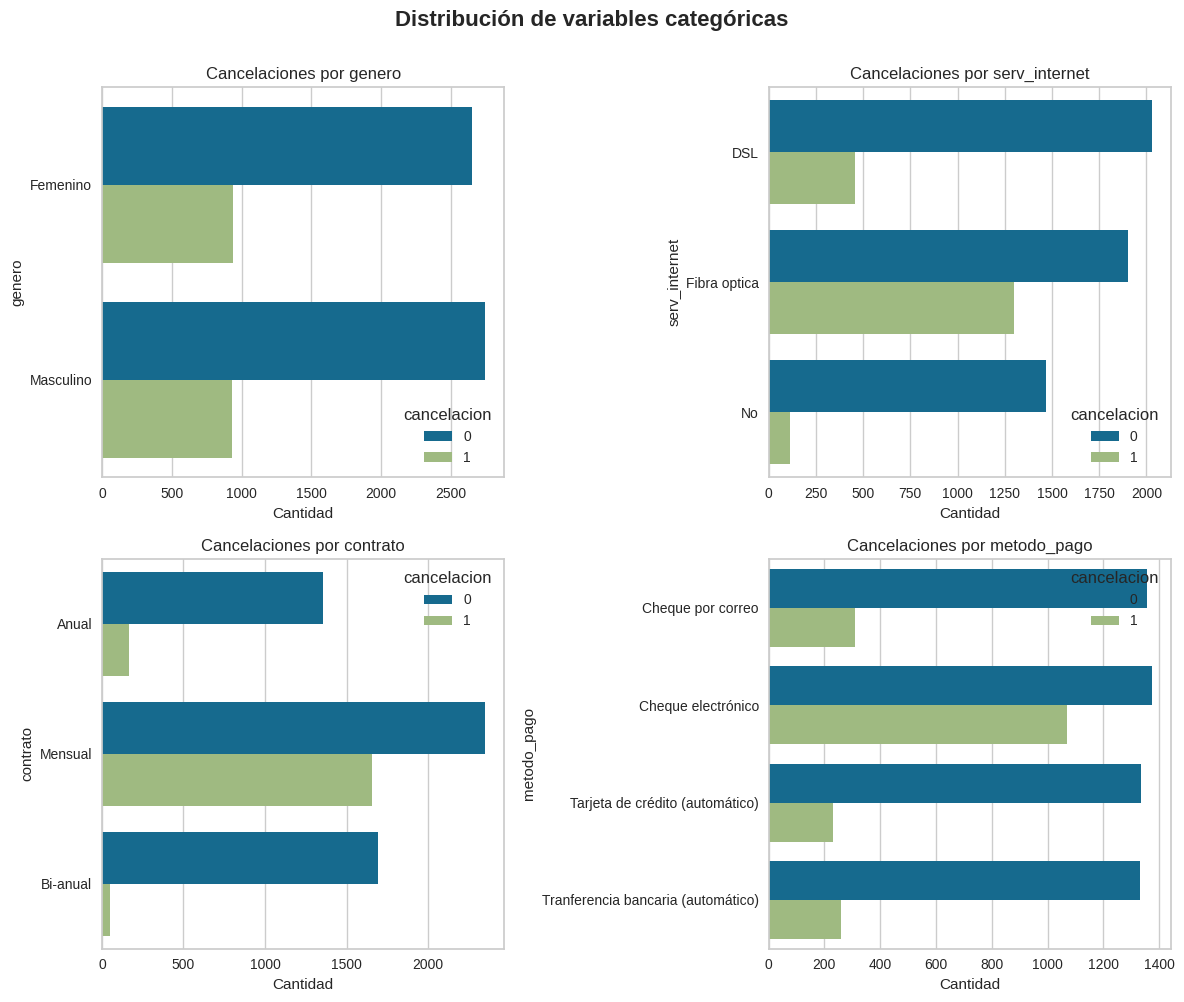

In [464]:
# filas y columnas para los subplots
n_cols_cat = 2  # Puedes ajustar este valor según sea necesario
n_rows_cat = (num_vars_cat + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(n_cols_cat * 6, n_rows_cat * 5))
plt.suptitle('Distribución de variables categóricas', y=1 ,fontsize=16, weight='bold')

for i, var in enumerate(var_categoricas):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(y=var, data=datos, hue='cancelacion')
    plt.title(f'Cancelaciones por {var}')
    plt.xlabel('Cantidad')
    plt.ylabel(var)

plt.tight_layout()
plt.savefig('2-cancelacionesVScategoricas.png', format='png', bbox_inches='tight')
plt.show()

#### Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas.
- variable  **y**  representa lo que queremos predecir,
- variable  **X**  incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [465]:
X_org = datos.drop(columns=['cancelacion'],axis=1)
y_org = datos['cancelacion']

In [466]:
X_org.sample(3,random_state=11)

,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total
3813,Femenino,0,1,0,33,1,1,Fibra optica,0,1,1,0,1,1,Mensual,1,Cheque electrónico,104.40,3409.60
1687,Femenino,1,1,0,72,1,1,Fibra optica,1,1,1,1,1,1,Bi-anual,1,Tranferencia bancaria (automático),114.85,8317.95
4948,Masculino,0,1,0,61,1,1,DSL,0,1,1,0,1,1,Bi-anual,0,Tranferencia bancaria (automático),80.90,4932.50


In [467]:
y_org.sample(3,random_state=11)

,cancelacion
3813,1
1687,0
4948,0


### Encoding: Codificación de variables categóricas

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [468]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [469]:
var_categoricas

['genero', 'serv_internet', 'contrato', 'metodo_pago']

In [470]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),var_categoricas),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

label_encoder = LabelEncoder()

In [471]:
datos_enc = one_hot.fit_transform(datos)
datos_enc

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        6.56000e+01, 5.93300e+02],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.99000e+01, 5.42400e+02],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.39000e+01, 2.80850e+02],
       ...,
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        5.03000e+01, 9.27500e+01],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.78500e+01, 4.62765e+03],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.90000e+01, 3.70760e+03]])

In [472]:
cols_datos_enc = one_hot.get_feature_names_out()
cols_datos_enc

array(['onehotencoder__genero_Masculino',
       'onehotencoder__serv_internet_DSL',
       'onehotencoder__serv_internet_Fibra optica',
       'onehotencoder__serv_internet_No', 'onehotencoder__contrato_Anual',
       'onehotencoder__contrato_Bi-anual',
       'onehotencoder__contrato_Mensual',
       'onehotencoder__metodo_pago_Cheque electrónico',
       'onehotencoder__metodo_pago_Cheque por correo',
       'onehotencoder__metodo_pago_Tarjeta de crédito (automático)',
       'onehotencoder__metodo_pago_Tranferencia bancaria (automático)',
       'remainder__cancelacion', 'remainder__mayor_65',
       'remainder__pareja', 'remainder__dependientes',
       'remainder__antiguedad', 'remainder__serv_telefonico',
       'remainder__multip_lineas', 'remainder__seguridad_online',
       'remainder__respaldo_online', 'remainder__proteccion_dispositivo',
       'remainder__serv_tecnico', 'remainder__tv_streaming',
       'remainder__peliculas_streaming', 'remainder__boleta_electronica',
   

In [473]:
columnas_encoded = []
for columna in cols_datos_enc:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

columnas_encoded

['genero_Masculino',
 'serv_internet_DSL',
 'serv_internet_Fibra optica',
 'serv_internet_No',
 'contrato_Anual',
 'contrato_Bi-anual',
 'contrato_Mensual',
 'metodo_pago_Cheque electrónico',
 'metodo_pago_Cheque por correo',
 'metodo_pago_Tarjeta de crédito (automático)',
 'metodo_pago_Tranferencia bancaria (automático)',
 'cancelacion',
 'mayor_65',
 'pareja',
 'dependientes',
 'antiguedad',
 'serv_telefonico',
 'multip_lineas',
 'seguridad_online',
 'respaldo_online',
 'proteccion_dispositivo',
 'serv_tecnico',
 'tv_streaming',
 'peliculas_streaming',
 'boleta_electronica',
 'pago_mensual',
 'pago_total']

In [474]:
datos_enc = pd.DataFrame(datos_enc, columns=columnas_encoded)
datos_enc

,genero_Masculino,serv_internet_DSL,serv_internet_Fibra optica,serv_internet_No,contrato_Anual,contrato_Bi-anual,contrato_Mensual,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automático),...,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7263,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7264,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7265,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


In [475]:
X_enc = datos_enc.drop(columns=['cancelacion'],axis=1)
y_enc = datos_enc['cancelacion']

In [476]:
import pickle
with open('one_hot_enc.pkl', 'wb') as file:
    pickle.dump(one_hot, file)

### Verificación de la Proporción de Cancelación (Churn)

- Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos.
- Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [477]:
# datos cancelación
datos_cancel = pd.DataFrame(datos['cancelacion'].map({0: 'No Canceló', 1: 'Canceló'})).rename(columns={'cancelacion': 'eleccion'})

In [478]:
from plotly.subplots import make_subplots

# gráficos individuales
fig_hist = px.histogram(datos_cancel, x='eleccion', color='eleccion', text_auto=True)
fig_pie = px.pie(datos_cancel, names='eleccion', hole=0.5)
# subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Cantidad', 'Porcentaje'),
    specs=[[{'type': 'xy'}, {'type': 'domain'}]])
# agregar gráficos
fig.add_traces(fig_hist.data, rows=1, cols=1)
fig.add_traces(fig_pie.data, rows=1, cols=2)
# Ajustar diseño
fig.update_traces(textinfo='label+percent', selector={'type': 'pie'})
fig.update_layout(title="Proporción de Cancelación (Churn)", showlegend=False, autosize=True)

# guardar como imagen
fig.write_image('3-proporcion_cancelaciones.png', width=700, height=400)

fig.show()

- Se podría inferir que existe cierto desbalance entre clases.
- Se evaluará con resultados de modelos si es necesario balancear las clases.

### Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

#### Oversampling

In [479]:
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN # Oversampling varios

- https://imbalanced-learn.org/stable/over_sampling.html
- https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn

<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_005.png" alt="Tipos de  Oversampling">

In [480]:
var_categoricas

['genero', 'serv_internet', 'contrato', 'metodo_pago']

SMOTENC
- variante de SMOTE
- puede tratar tipos de datos mixtos, como características continuas y categóricas.

In [481]:
oversampling_smotenc = SMOTENC(categorical_features=var_categoricas, random_state=0)
X_over_smtc, y_over_smtc = oversampling_smotenc.fit_resample(X_org, y_org)

In [482]:
y_over_smtc.value_counts() # generó muchos datos sintéticos

,count
cancelacion,
0,5398
1,5398


In [483]:
y_over_smtc.value_counts(normalize=True) # proporción porcentual

,proportion
cancelacion,
0,0.5
1,0.5


In [484]:
X_over_smtc.sample(3)

,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total
371,Masculino,1,1,0,55,1,1,Fibra optica,0,0,0,0,0,0,Mensual,1,Cheque electrónico,74.00,4052.40
254,Masculino,0,0,0,23,1,1,Fibra optica,0,0,0,1,1,0,Mensual,1,Cheque electrónico,90.60,1943.20
3909,Masculino,0,1,0,8,1,0,No,0,0,0,0,0,0,Mensual,0,Cheque por correo,20.25,158.35


#### Undersampling

In [485]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, NeighbourhoodCleaningRule # Undersampling varios

https://imbalanced-learn.org/stable/under_sampling.html

**neighbourhoodCleaningRule:**
- es un submuestreo por limpieza de observaciones “ruidosas” u observaciones que son “demasiado fáciles de clasificar”

In [486]:
undersampling_neighbourhoodCleaningRule = NeighbourhoodCleaningRule(n_neighbors=11)
X_ncr, y_ncr = undersampling_neighbourhoodCleaningRule.fit_resample(X_enc, y_enc)

In [487]:
y_ncr.value_counts() # redujo por demas la clase minoritaria

,count
cancelacion,
1.0,1869
0.0,1578


**nearMiss:**
- es un submuestreo controlado aleatorio que agrega algunas reglas heurísticas para seleccionar muestras
- puede manejar tipos de datos heterogéneos, es decir, numéricos, categórico, fechas, etc.
- implementa 3 tipos diferentes de heurística con el parámetro 'version'

In [488]:
undersampling_nearmiss = NearMiss(version=3)

X_under_nmss, y_under_nmss = undersampling_nearmiss.fit_resample(X_enc, y_enc)

In [489]:
y_under_nmss.value_counts() # redujo hasta la clase minoritaria

,count
cancelacion,
0.0,1869
1.0,1869


### Normalización o Estandarización

- Es fundamental distinguir entre normalización y escalado porque afectan diferentes aspectos del conjunto de datos.
- Mientras que la normalización se aplica a las muestras individuales, el escalado transforma las características.
- Esta diferencia es crucial al seleccionar técnicas de preprocesamiento para algoritmos que son sensibles a la magnitud de los datos.

Consideraciones sobre algoritmos:

- los que SI necesitan datos a la misma escala: KNN (K-Nearest Neighbours), Redes Neurales, Regresión Lineal, Regresión Logística y SVM.

- los que NO necesitan los datos en la misma escala: Árboles de Decisión, Bosque Aleatorio, AdaBoost, Naive Bayes, etc. (pero se recomienda realizar pruebas para normalizacion o estandarización).

**Normalización:**
- coloca los datos en el rango entre 0 y 1 o, -1 y 1 si hay valores negativos, sin distorsionar las diferencias en los rangos de valores. Es decir, no elimina los valores atípicos (valores extremos).

La siguiente fórmula matemática nos permite normalizar los datos:

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [490]:
from sklearn.preprocessing import Normalizer

- Es posible especificar diferentes tipos de normas mediante el parámetro norm.
- Por defecto, se utiliza la norma L2, pero se pueden utilizar otras, como la norma L1 o la norma máxima max.

In [491]:
normalizer = Normalizer(norm='l2')

X_normalizado = normalizer.fit_transform(X_enc)
X_normalizado = pd.DataFrame(X_normalizado, columns=X_enc.columns)
X_normalizado.head()

,genero_Masculino,serv_internet_DSL,serv_internet_Fibra optica,serv_internet_No,contrato_Anual,contrato_Bi-anual,contrato_Mensual,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automático),...,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total
0,0.000000,0.001675,0.000000,0.0,0.001675,0.0,0.000000,0.000000,0.001675,0.0,...,0.000000,0.0,0.001675,0.000000,0.001675,0.001675,0.000000,0.001675,0.109884,0.993816
1,0.001832,0.001832,0.000000,0.0,0.000000,0.0,0.001832,0.000000,0.001832,0.0,...,0.001832,0.0,0.000000,0.000000,0.000000,0.000000,0.001832,0.000000,0.109752,0.993810
2,0.003443,0.000000,0.003443,0.0,0.000000,0.0,0.003443,0.003443,0.000000,0.0,...,0.000000,0.0,0.000000,0.003443,0.000000,0.000000,0.000000,0.003443,0.254433,0.966949
3,0.000805,0.000000,0.000805,0.0,0.000000,0.0,0.000805,0.000805,0.000000,0.0,...,0.000000,0.0,0.000805,0.000805,0.000000,0.000805,0.000805,0.000805,0.078918,0.996822
4,0.000000,0.000000,0.003568,0.0,0.000000,0.0,0.003568,0.000000,0.003568,0.0,...,0.000000,0.0,0.000000,0.000000,0.003568,0.003568,0.000000,0.003568,0.299338,0.954027


Un ejemplo de cómo crear un pipeline con Normalizer:

```python
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Crear un pipeline que incluye el normalizador y un modelo
pipeline = make_pipeline(Normalizer(), LogisticRegression(), memory = None)

# Datos de ejemplo
X = np.array([[4, 1, 2, 2],
              [1, 3, 9, 3],
              [5, 7, 5, 1]])
y = np.array([0, 1, 0])

# Entrenar el modelo utilizando el pipeline
pipeline.fit(X, y)

# Realizar predicciones
predicciones = pipeline.predict(X)
print("\nPredicciones del modelo:")
print(predicciones)
```

**Estandarización:**
- tiene la misma idea que la normalización, es decir, poner los datos en la misma escala.
- Sin embargo, en la estandarización ponemos la media de los datos en 0 y la desviación estándar en 1.
- Este algoritmo se utiliza mejor cuando nuestra distribución es gaussiana.

La fórmula de puntuación z es una de las más comunes para la estandarización:

$z = \frac{x - µ}{Õ} $

In [492]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [493]:
scaler_standard = StandardScaler()

datos_stand_standardS = scaler_standard.fit_transform(X_enc)
datos_stand_standardS = pd.DataFrame(datos_stand_standardS, columns=X_enc.columns)
datos_stand_standardS.head()

# X_train_standard = scaler_standard.fit_transform(X_train)
# X_test_standard = scaler_standard.transform(X_test)

,genero_Masculino,serv_internet_DSL,serv_internet_Fibra optica,serv_internet_No,contrato_Anual,contrato_Bi-anual,contrato_Mensual,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automático),...,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total
0,-1.011487,1.385936,-0.886534,-0.527306,1.945268,-0.561723,-1.108050,-0.712075,1.834275,-0.524534,...,-0.854058,-0.632821,1.379187,-0.722195,1.566492,1.266752,-0.795404,0.828063,0.029206,-0.742291
1,0.988643,1.385936,-0.886534,-0.527306,-0.514068,-0.561723,0.902487,-0.712075,1.834275,-0.524534,...,1.170881,-0.632821,-0.725065,-0.722195,-0.638369,-0.789421,1.257223,-1.207638,-0.159990,-0.764729
2,0.988643,-0.721534,1.127988,-0.527306,-0.514068,-0.561723,0.902487,1.404346,-0.545175,-0.524534,...,-0.854058,-0.632821,-0.725065,1.384667,-0.638369,-0.789421,-0.795404,0.828063,0.304702,-0.880026
3,0.988643,-0.721534,1.127988,-0.527306,-0.514068,-0.561723,0.902487,1.404346,-0.545175,-0.524534,...,-0.854058,-0.632821,1.379187,1.384667,-0.638369,1.266752,1.257223,0.828063,1.104635,-0.458160
4,-1.011487,-0.721534,1.127988,-0.527306,-0.514068,-0.561723,0.902487,-0.712075,1.834275,-0.524534,...,-0.854058,-0.632821,-0.725065,-0.722195,1.566492,1.266752,-0.795404,0.828063,0.636624,-0.885955


In [494]:
scaler_robust = RobustScaler()

datos_norm_robust = scaler_robust.fit_transform(datos_enc)
datos_norm_robust = pd.DataFrame(datos_norm_robust, columns=datos_enc.columns)
datos_norm_robust.head()

#X_train_normalizado = scaler_robust.fit_transform(X_train)
#X_test = scaler_robust.transform(X_test)

,genero_Masculino,serv_internet_DSL,serv_internet_Fibra optica,serv_internet_No,contrato_Anual,contrato_Bi-anual,contrato_Mensual,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automático),...,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total
0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.086318,-0.235312
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-0.191001,-0.250360
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.066116,-0.327689
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.508724,-0.044747
4,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.249770,-0.331665


### Pipeline y ColumnTransformer

In [495]:
from sklearn.pipeline import Pipeline

In [496]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

## 3. 🎯 Correlación y Selección de Variables

### Análisis de Correlación _ de variables numéricas

- Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas.
- Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [497]:
datos_enc.head(3)

,genero_Masculino,serv_internet_DSL,serv_internet_Fibra optica,serv_internet_No,contrato_Anual,contrato_Bi-anual,contrato_Mensual,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automático),...,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85


In [498]:
# matrix de correlación
matriz_corr = datos_enc.corr(method='pearson')
matriz_corr.head(3)

,genero_Masculino,serv_internet_DSL,serv_internet_Fibra optica,serv_internet_No,contrato_Anual,contrato_Bi-anual,contrato_Mensual,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automático),...,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total
genero_Masculino,1.000000,0.004520,-0.009572,0.006318,0.007328,-0.005449,-0.001312,0.002060,0.015057,0.000700,...,-0.007805,-0.016974,-0.013494,-0.002740,-0.009112,-0.008451,-0.012475,-0.011273,-0.013889,0.000367
serv_internet_DSL,0.004520,1.000000,-0.639664,-0.380469,0.047030,0.030054,-0.064248,-0.105013,0.040682,0.053696,...,-0.201638,0.319329,0.158484,0.144904,0.311817,0.017167,0.023744,-0.060781,-0.160723,-0.054389
serv_internet_Fibra optica,-0.009572,-0.639664,1.000000,-0.467474,-0.073950,-0.212975,0.243291,0.339716,-0.307197,-0.050565,...,0.367220,-0.027895,0.166285,0.178009,-0.018282,0.329575,0.325911,0.327790,0.788453,0.363633


Mapa de Calor o Heatmap para visualizar Matriz de Correlación:

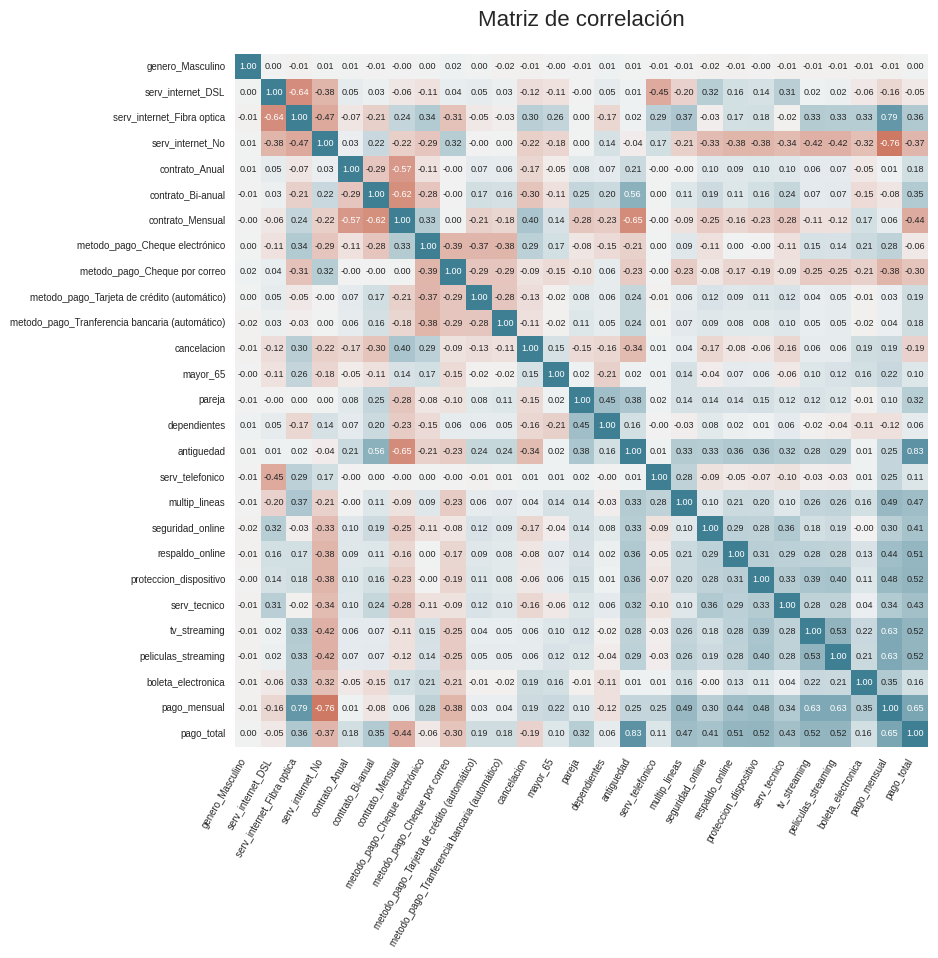

In [499]:
# mapa de calor
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(matriz_corr, annot=True, fmt=".2f", cbar=False, annot_kws={"size": 6.5},
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
            square=True, ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 60,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 7)
plt.title('Matriz de correlación', fontsize=16, pad=20)

# guardar el gráfico como imagen PNG
plt.savefig('4-MC_correlaciones.png', format='png', bbox_inches='tight')

- muestra todas las correlaciones simultaneas de las 27 variables, 27 x 27 = 729 datos.
- no nos aporta relevancia al no tener un orden para clasificar variables mas relevantes

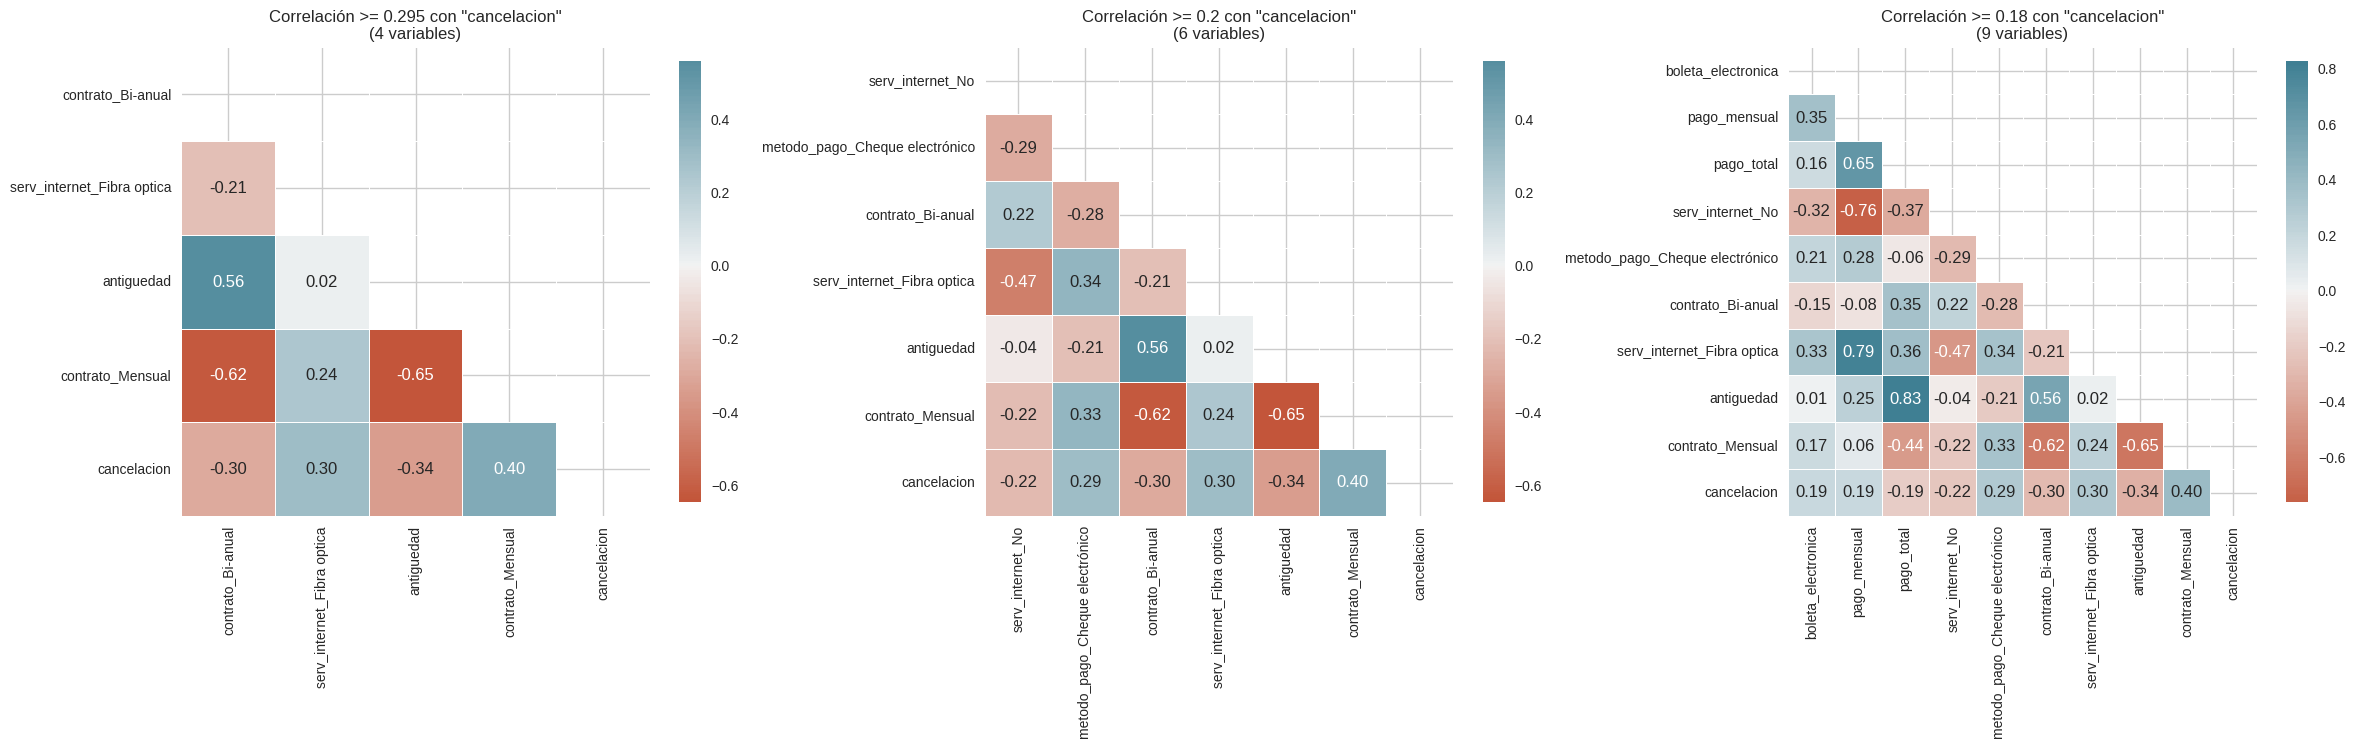

In [500]:
# variable objetivo
target_var = 'cancelacion'
# umbrales a graficaar
umbrales = [0.295, 0.20, 0.18]
# figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Iterar sobre los umbrales y crear un heatmap para cada uno
for i, limitar in enumerate(umbrales):
    # Filtrar variables relevantes y ordenar
    var_relevantes = matriz_corr.index[abs(matriz_corr[target_var]) >= limitar].tolist()
    var_relevantes_ord = matriz_corr.loc[var_relevantes, target_var].abs().sort_values(ascending=True).index.to_list()
        # Asegurar que la variable objetivo esté en la lista
    if target_var not in var_relevantes_ord:
        var_relevantes_ord.append(target_var)
    # Crear matriz de correlación filtrada
    corr_filtrada = matriz_corr.loc[var_relevantes_ord, var_relevantes_ord]
    # Generar máscara
    mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))
    # Crear heatmap en el subplot correspondiente
    sns.heatmap(corr_filtrada, annot=True, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), center=0, square=True,
        linewidths=0.5, cbar_kws={"shrink": 0.7}, mask=mascara, ax=axes[i]    )
    axes[i].set_title(f'Correlación >= {limitar} con "{target_var}"\n({len(var_relevantes_ord)-1} variables)')

plt.tight_layout()
# Guardar y mostrar
plt.savefig('5-MC_correlaciones_varias.png', bbox_inches='tight')
plt.show()

Aqui se aprecian mucho mejor las variables mas complicadas:
- reducimos variables aplicando umbrales de correlación
- ordenamos por valor absoluto para mejor comprensión

In [501]:
print('Variables mas relevantes ordenadas por valor absoluto de correlación con la variable "cancelación".')
print()
var_relevantes_ord = matriz_corr.loc[var_relevantes, target_var].abs().sort_values(ascending=False).index.to_list()
var_relevantes_ord

Variables mas relevantes ordenadas por valor absoluto de correlación con la variable "cancelación".



['cancelacion',
 'contrato_Mensual',
 'antiguedad',
 'serv_internet_Fibra optica',
 'contrato_Bi-anual',
 'metodo_pago_Cheque electrónico',
 'serv_internet_No',
 'pago_total',
 'pago_mensual',
 'boleta_electronica']

Gráfico de Barras o Barplot con las Correlaciones Ordenadas

In [502]:
# dataFrame para el gráfico
df_graf = (pd.DataFrame({'Correlación': (matriz_corr.loc['cancelacion'].drop('cancelacion'))
                                            .apply(lambda x: 'Directa' if x > 0 else 'Inversa'),
                         'Magnitud': np.round((matriz_corr.loc['cancelacion'].drop('cancelacion').abs()),4)})
          ).reset_index(
                        ).rename(columns={'index': 'Columnas'}
                                 ).sort_values(by='Magnitud', ascending=False)
df_graf.head(2)

,Columnas,Correlación,Magnitud
6,contrato_Mensual,Directa,0.3956
14,antiguedad,Inversa,0.3441


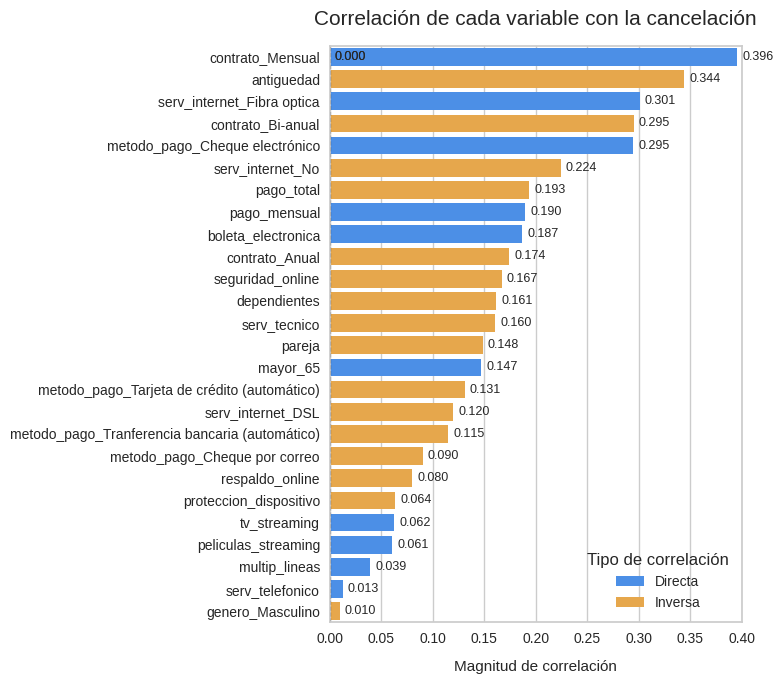

In [503]:
# gráfico
plt.figure(figsize=(8, 7))
plot = sns.barplot(data=df_graf, x='Magnitud', y='Columnas', hue='Correlación',
                  palette={'Directa':'#338cff', 'Inversa':'#ffac33'}, dodge=False)

# añadir etiquetas
[plt.text(p.get_width()+0.005, p.get_y()+p.get_height()/2, f'{p.get_width():.3f}',
          ha='left', va='center', fontsize=9) for p in plot.patches]

# configuración del gráfico
plt.title('Correlación de cada variable con la cancelación', fontsize=15, pad=15)
plt.xlabel('Magnitud de correlación', labelpad=10)
plt.ylabel('')
plt.xlim(0, 0.4)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Tipo de correlación')
plt.tight_layout()

# Guardar y mostrar
plt.savefig('6-GB_correlaciones_ordenadas.png', bbox_inches='tight')
plt.show()

Aqui se aprecian todas las variables:
- ordenadas por correlación
- de mayor a menor valor absoluto
- tipo de relación directa o inversa

## 4. 🔍 Análisis de Multicolinealidad con VIF


https://www.datacamp.com/es/tutorial/variance-inflation-factor

- La multicolinealidad hace que aumenten los errores estándar, lo que dificulta la evaluación de la importancia de los predictores individuales.
- El factor de inflación de la varianza (VIF) sirve como métrica diagnóstica precisa para identificar la multicolinealidad.

### Factor de Inflación de la Varianza (VIF):



* El VIF ayuda a detectar la presencia de multicolinealidad entre variables independientes.
* Generalmente, **VIF > 5** indica que la variable está colineal con otras y puede ser eliminada.
* **VIF > 10** multicolinealidad grave, eliminar el predictor o utilizar técnicas de regularización.

La fórmula del factor de inflación de la varianza
El VIF de un predictor X se calcula como:

Fórmula del factor de inflación de la varianza (VIF)

**$VIF_{(X)} = 1 - R^2 $**

Dónde:

R2 es el coeficiente de determinación obtenido cuando X​ se hace una regresión sobre todos los demás predictores.

**¿Cuándo es válido calcular el VIF?**

---

✅ Puedo (y debo) calcular el VIF si:

- **Voy a usar modelos lineales** (ej.: regresión logística, regresión lineal)
- **Quiero interpretar los coeficientes** con claridad (la multicolinealidad distorsiona signos y magnitudes)
- **Quieres garantizar estabilidad en el modelo**


❌ ¿Cuándo puedo descartar el VIF (o postergarlo)?

* Si vas a usar **modelos no lineales**, como:

  * Árboles de decisión
  * Random Forest
  * XGBoost
  * Redes neuronales

Estos modelos **no son sensibles a la multicolinealidad**.

---

Preguntas Clave:

| Pregunta                                           | Respuesta                                             |
| -------------------------------------------------- | ----------------------------------------------------- |
| ¿El nuevo heatmap muestra multicolinealidad grave? | **No**                                                |
| ¿Necesito calcular el VIF obligatoriamente?        | **No, pero es recomendable si usas modelos lineales** |
| ¿Vale la pena como verificación extra?             | **Sí, especialmente si el modelo es interpretativo**  |

---

- Como tengo programado utilizar regresión logística, **calcularé el VIF**.


### Calculo práctico de VIF

1. Importar las bibliotecas necesarias
```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
```

2. Seleccionar las variables independientes
```python
# quitamos la variable objetivo o dependiente
X = datos_enc.drop(columns=['cancelacion'])
```


3. Añadir constante (intercepto)
```python
X_const = add_constant(X)
```

4. Calcular el VIF
```python
# convertir columnas booleanas a enteros (0 o 1)
X_const = X_const.astype(float)
# calcular el VIF
vif_data = pd.DataFrame()
vif_data["caracteristicas"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
```

Función para calcular VIF

In [504]:
def calcular_vif(df,obj):
  # importar bibliotecas
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  from statsmodels.tools.tools import add_constant
  # quitamos la variable objetivo o dependiente
  X = df.drop(columns=obj)
  # añadir constantes
  X_const = add_constant(X)
  # convertir columnas booleanas a enteros (0 o 1)
  X_const = X_const.astype(float)
  # calcular el VIF
  vif_dt = pd.DataFrame()
  vif_dt["caracteristicas"] = X_const.columns
  vif_dt["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
  vif_dt = vif_dt.sort_values(by='VIF', ascending=False)

  return vif_dt

Función para Visualizar Resultados VIF

In [505]:
def mostrar_vif(vif_dat):
  # importar bibliotecas
  from math import inf
  from IPython.display import display, HTML

  bins = [0,5,10,inf]
  labels = ['VIF < 5', '5 ≤ VIF < 10', 'VIF ≥ 10']

  vif_dat['rango'] = pd.cut(vif_dat["VIF"], bins=bins, labels=labels, right=False)
  vif_dat = vif_dat.sort_values(by='VIF', ascending=False)
  #display(vif_dat.sort_values(by='VIF', ascending=False))

  vif_0_5 = vif_dat[vif_dat['rango'] == 'VIF < 5']
  vif_5_10 = vif_dat[vif_dat['rango'] == '5 ≤ VIF < 10']
  vif_10_x = vif_dat[vif_dat['rango'] == 'VIF ≥ 10']
  vif_inf = vif_dat[vif_dat['VIF'] == inf]

  # Crear HTML para el grid
  html = """
  <h2>Niveles de Multicolinearidad</h2>
  <div style="display: grid; grid-template-columns: 1fr 1fr; grid-gap: 20px;">
      <div style="grid-column: 1; grid-row: 1;"><h4>Tabla 1 - Perfecta (inaceptable) </h4>{}</div>
      <div style="grid-column: 2; grid-row: 1;"><h4>Tabla 2 - Alta (¡atención!)</h4>{}</div>
      <div style="grid-column: 1; grid-row: 2;"><h4>Tabla 3 - Moderada (vigilar)</h4>{}</div>
      <div style="grid-column: 2; grid-row: 2;"><h4>Tabla 4 - Baja (aceptable)</h4>{}</div>
  </div>
  """.format(vif_inf.to_html(), vif_10_x.to_html(), vif_5_10.to_html(), vif_0_5.to_html())

  display(HTML(html))

In [506]:
df = datos_enc
col_obj = ['cancelacion']

mostrar_vif(calcular_vif(df,col_obj))

,caracteristicas,VIF,rango
2,serv_internet_DSL,inf,NaN
4,serv_internet_No,inf,NaN
3,serv_internet_Fibra optica,inf,NaN
7,contrato_Mensual,inf,NaN
8,metodo_pago_Cheque electrónico,inf,NaN
5,contrato_Anual,inf,NaN
6,contrato_Bi-anual,inf,NaN
9,metodo_pago_Cheque por correo,inf,NaN
10,metodo_pago_Tarjeta de crédito (automático),inf,NaN
11,metodo_pago_Tranferencia bancaria (automático),inf,NaN


### 🔍 Principales alertas en los resultados

---
1. ❗️ **Tabla 1**

VIF = `inf` = ∞ (infinito)

Estas variables **siguen siendo perfectamente colineales entre sí** o con otra variable.

🔍 Causa probable:

* Ambas provienen de **la misma variable categórica original** (`PhoneService`), y el encoding generó **redundancia**.
* Si el cliente **no tiene teléfono**, no puede tener múltiples líneas ⇒ valores 100% ligados.
* otros

📌 **Solución recomendada:**

* **Elimina una de estas columnas.** Por ejemplo:

  ```python
  df.drop(columns=["phone.PhoneService_Yes"], inplace=True)
  ```
* O rehacer el encoding con `drop_first=True` para simplificar la estructura.

In [507]:
from math import inf
# columnas con VIF infinitos
cols_vif_inf = (calcular_vif(datos_enc,col_obj)[calcular_vif(datos_enc,col_obj)['VIF'] == inf])['caracteristicas'].tolist()

# variables rectificadas
var_rectif = datos_enc.columns
var_rectif = var_rectif.drop(cols_vif_inf)
var_rectif

Index(['genero_Masculino', 'cancelacion', 'mayor_65', 'pareja', 'dependientes',
       'antiguedad', 'serv_telefonico', 'multip_lineas', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'serv_tecnico',
       'tv_streaming', 'peliculas_streaming', 'boleta_electronica',
       'pago_mensual', 'pago_total'],
      dtype='object')

---

2. ❗️ **Tabla 2**

`pago_mensual` → VIF = **813.86**

* Esto es extremadamente alto.
* Esta variable está **altamente correlacionada con `pago_total`.

📌 **Solución:**

* Verifico si `pago_mensual` y `pago_total` contiene **información repetida** (ej.: `Total = pago_mensual * antiguedad`).


In [508]:
# verifico
datos_a_verificar= pd.DataFrame()
datos_a_verificar['Pago Total'] = datos_enc['pago_total']
datos_a_verificar['PagoMensual X Antiguedad'] = pd.DataFrame(datos_enc['pago_mensual'] * datos_enc['antiguedad'])
datos_a_verificar['Diferencia'] = pd.DataFrame(datos_a_verificar['Pago Total'] - datos_a_verificar['PagoMensual X Antiguedad'])
datos_a_verificar['Porcentual'] = pd.DataFrame(((datos_a_verificar['Diferencia'] / datos_a_verificar['PagoMensual X Antiguedad'])*100).round(2))
datos_a_verificar.sample(5)

,Pago Total,PagoMensual X Antiguedad,Diferencia,Porcentual
1012,19.00,19.00,0.00,0.00
6158,1032.05,1014.30,17.75,1.75
2823,1714.95,1635.20,79.75,4.88
5602,5585.40,5687.10,-101.70,-1.79
4507,426.35,393.75,32.60,8.28


* Si es así, **elimino una o dos de estas columnas** para evitar redundancia.

In [509]:
# son casi iguales por eso producen alta colinearidad
# elimino variable 'pago_total'
var_rectif = var_rectif.drop('pago_total')
var_rectif

Index(['genero_Masculino', 'cancelacion', 'mayor_65', 'pareja', 'dependientes',
       'antiguedad', 'serv_telefonico', 'multip_lineas', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'serv_tecnico',
       'tv_streaming', 'peliculas_streaming', 'boleta_electronica',
       'pago_mensual'],
      dtype='object')

---
3. ⚠️ Otros VIFs altos (moderados a severos)

| Variable                          | VIF       | Posibles Soluciones                                  |
| --------------------------------- | --------- | ------------------------------------------- |
| `serv_telefonico`              | 35.1      | Dependencia con servicio DSL que ya fue eliminada                        |
| `tv_streaming` / `peliculas_streaming` | 24.1–24.2 | Dependen directamente de tener internet     |
| `pago_total`                   | 10.8      | Ya eliminada, relacionado con `pago_mensual` y `antiguedad`        |

📌 **Soluciones combinadas:**

* Mantener **solo una** de las variables entre `serv_internet_Fibra optica`, `serv_internet_No` o usar `drop_first=True`.
* Evaluar si es necesario mantener **todas** las variables derivadas de internet (streaming, seguridad, etc.).

### VIF Rectificado

In [510]:
datos_enc_rectif= pd.DataFrame()
datos_enc_rectif = datos_enc[var_rectif]
#df
col_obj = ['cancelacion']

mostrar_vif(calcular_vif(datos_enc_rectif,col_obj))

,caracteristicas,VIF,rango
,caracteristicas,VIF,rango
0,const,16.862442,VIF ≥ 10
,caracteristicas,VIF,rango
,caracteristicas,VIF,rango
15,pago_mensual,4.369251,VIF < 5
13,peliculas_streaming,1.900793,VIF < 5
12,tv_streaming,1.894994,VIF < 5
5,antiguedad,1.735491,VIF < 5
7,multip_lineas,1.533468,VIF < 5
10,proteccion_dispositivo,1.532360,VIF < 5


✅ Análisis del nuevo VIF

| Rango de VIF | Interpretación                      |
| ------------ | ----------------------------------- |
| VIF ≈ 1      | Sin multicolinealidad (óptimo)      |
| 1 < VIF ≤ 5  | Baja (aceptable)                    |
| 5 < VIF ≤ 10 | Moderada (vigilar)                  |
| VIF > 10     | Alta (atención o posible exclusión) |


### ✅ Conclusión práctica

* ✅ **La multicolinealidad crítica fue resuelta** (sin `inf`, sin redundancia perfecta)
* ⚠️ **Solo `pago_mensual` tiene una multicolinealidad moderada que es aceptable**


## 5. 🤖 Modelos Predictivos


### Importación de las bibliotecas

In [511]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, recall_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

### Separar features y target - caracteristicas y objetivo

In [512]:
X = datos_enc_rectif.drop(columns=['cancelacion'])
y = datos_enc_rectif['cancelacion']

### Dividir entrenamiento, prueba y validación


df = cv(85%) + test(15%)

- cv = train + val

df = train(76.5%) + val(8.5%) + test(15%)

In [513]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [514]:
X_train, X_val, y_train, y_val = train_test_split(X_cv, y_cv, test_size=0.10, stratify=y_cv, random_state=42)

### Normalizar entrenamiento

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [515]:
# con StandardScaler
scaler_standard = StandardScaler()
X_train_scaled_std = scaler_standard.fit_transform(X_train)
X_test_scaled_std = scaler_standard.transform(X_test)

In [516]:
# con RobustScaler
scaler_robust = RobustScaler()
X_train_scaled_robust = scaler_robust.fit_transform(X_train)
X_test_scaled_robust = scaler_robust.transform(X_test)

### Balancear entrenamiento

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [517]:
#con SMOTE (oversampling)
bal_smote = SMOTE(random_state=42)
X_train_bal_smt, y_train_bal_smt = bal_smote.fit_resample(X_train, y_train)

In [518]:
#con SMOTENC (oversampling)
bal_smotenc = SMOTENC(categorical_features=var_categoricas, random_state=42)
X_train_bal_smtc, y_train_bal_smtc = bal_smotenc.fit_resample(X_org, y_org) # no funciona sin categóricas

In [519]:
#con NearMiss (undersampling)
bal_nearmiss = NearMiss(version=3)
X_train_bal_nrmss, y_train_bal_nrmss = bal_nearmiss.fit_resample(X_train, y_train)

## Ajustes varios:

In [520]:
X_cv.shape

(6176, 15)

In [521]:
resultados_cv = pd.DataFrame()

In [522]:
# Reporte Visual
def reporte_gral(model_name, y_test, y_pred, y_prob, nombre_img=None, dpi=100):
    plt.figure(figsize=(12, 10))
    plt.suptitle(f"Evaluación del Modelo {model_name}", fontsize=16, y=1.02)
    # 1. Reporte de Clasificación
    plt.subplot(2, 2, 1)
    report = classification_report(y_test, y_pred, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlOrRd', cbar=False)
    plt.title('Informe de clasificación')
    # 2. Métricas Principales
    plt.subplot(2, 2, 2)
    metrics = {'Accuracy': accuracy_score(y_test, y_pred),'ROC AUC': roc_auc_score(y_test, y_prob)}
    plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen'])
    plt.ylim(0, 1)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
    plt.title('Metricas Clave')
    # 3. Curva ROC
    plt.subplot(2, 2, 3)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa falsos positivos'); plt.ylabel('Tasa verdaderos positivos')
    plt.title('Curva ROC'); plt.legend(loc="lower right")
    # 4. Matriz de Confusión
    plt.subplot(2, 2, 4)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusion')
    plt.xlabel('Predicción'); plt.ylabel('Actual')

    plt.tight_layout()
    # Guardar imagen si se especificó save_path
    if nombre_img:
        plt.savefig(nombre_img, dpi=dpi, bbox_inches='tight')
    plt.show()

In [523]:
# para ver las métricas posibles de cross_validate
# sklearn.metrics.get_scorer_names()

## **Modelo Decision Tree Classifier**

In [524]:
# Instanciar
dtc = DecisionTreeClassifier(max_depth=10, random_state=42)

In [525]:
# Entrenar
dtc.fit(X_cv, y_cv)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [526]:
# Predicciones
y_pred_dtc = dtc.predict(X_test)
y_prob_dtc = dtc.predict_proba(X_test)[:, 1] # Probabilidades de la clase positiva (Churn=1)

In [527]:
# Validar
cv_skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

resultados_cv_dtc = cross_validate(dtc, X_cv, y_cv, cv=cv_skf,
                                   scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])


resultados_cv = pd.concat([resultados_cv,(pd.DataFrame([{'Modelo': 'Decision Tree Classifier',
                                        'Precisión_media': resultados_cv_dtc['test_accuracy'].mean(),
                                        'Precisión_std': resultados_cv_dtc['test_accuracy'].std(),
                                        'ROC_AUC_media': resultados_cv_dtc['test_roc_auc'].mean(),
                                        'ROC_AUC_std': resultados_cv_dtc['test_roc_auc'].std(),
                                        'Tiempo_ajuste': resultados_cv_dtc['fit_time'].mean()}]))], ignore_index=True)
resultados_cv

,Modelo,Precisión_media,Precisión_std,ROC_AUC_media,ROC_AUC_std,Tiempo_ajuste
0,Decision Tree Classifier,0.756315,0.003001,0.733766,0.009919,0.017224


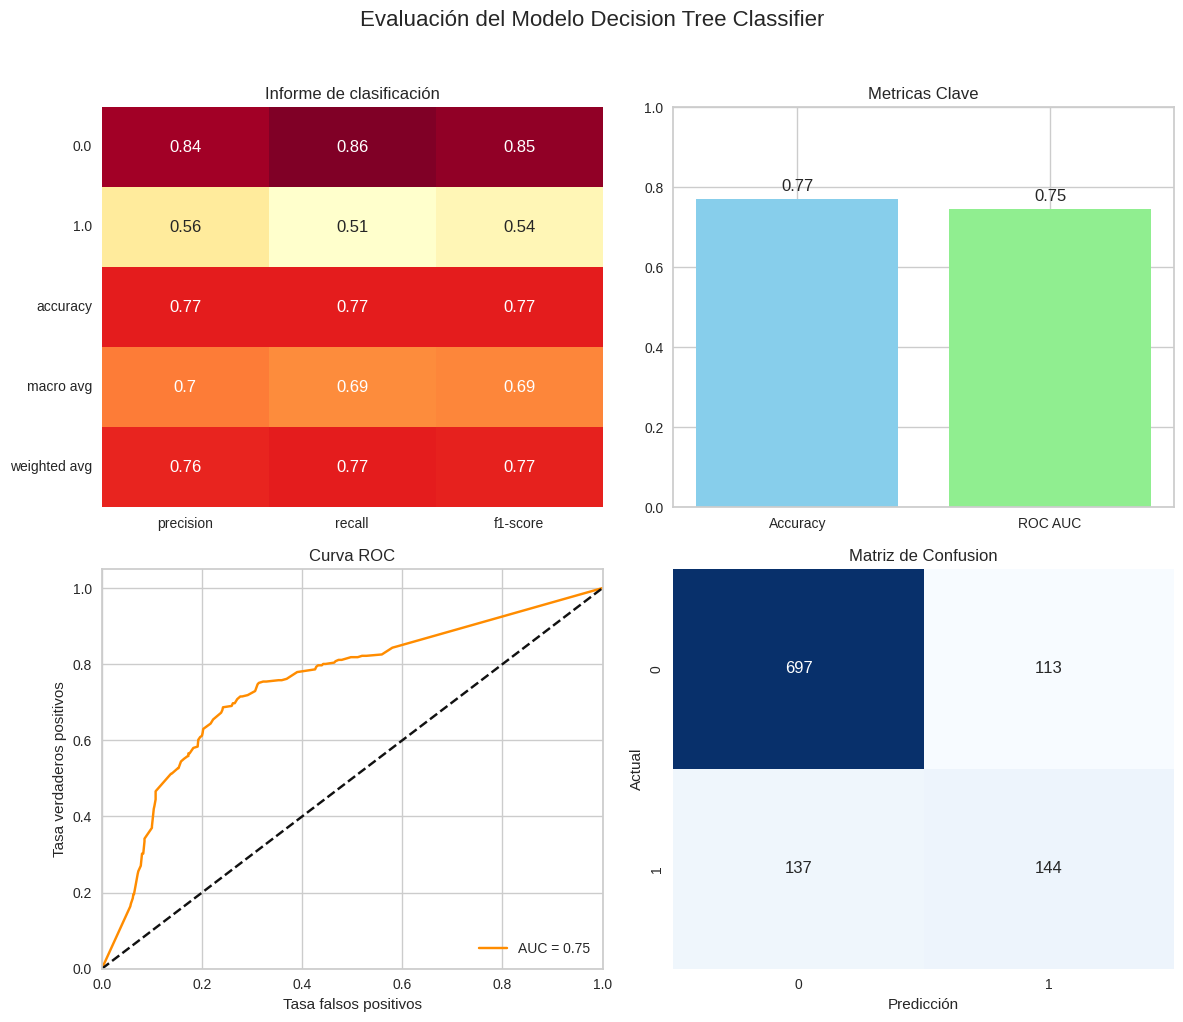

In [528]:
# Evaluación
reporte_gral('Decision Tree Classifier',y_test,y_pred_dtc,y_prob_dtc,'7-evaluacion_DTC')

### **Modelo Regresión Logística**


In [529]:
# Instanciar
#       'liblinear' es un buen solver para datasets pequeños y medianos, y soporta penalización L1/L2
logistic_regression = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)


In [530]:
# Validar
resultados_cv_lr = cross_validate(logistic_regression, X_cv, y_cv, cv=cv_skf, scoring=['accuracy', 'roc_auc'])

resultados_cv = pd.concat([resultados_cv,(pd.DataFrame([{'Modelo': 'Regresión Logística',
                                        'Precisión_media': resultados_cv_lr['test_accuracy'].mean(),
                                        'Precisión_std': resultados_cv_lr['test_accuracy'].std(),
                                        'ROC_AUC_media': resultados_cv_lr['test_roc_auc'].mean(),
                                        'ROC_AUC_std': resultados_cv_lr['test_roc_auc'].std(),
                                        'Tiempo_ajuste': resultados_cv_lr['fit_time'].mean()}]))], ignore_index=True)
resultados_cv

,Modelo,Precisión_media,Precisión_std,ROC_AUC_media,ROC_AUC_std,Tiempo_ajuste
0,Decision Tree Classifier,0.756315,0.003001,0.733766,0.009919,0.017224
1,Regresión Logística,0.800677,0.008679,0.829352,0.008810,0.016890


In [531]:
# Entrenar
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [532]:
# Predicciones
y_pred_lr = logistic_regression.predict(X_test)
y_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

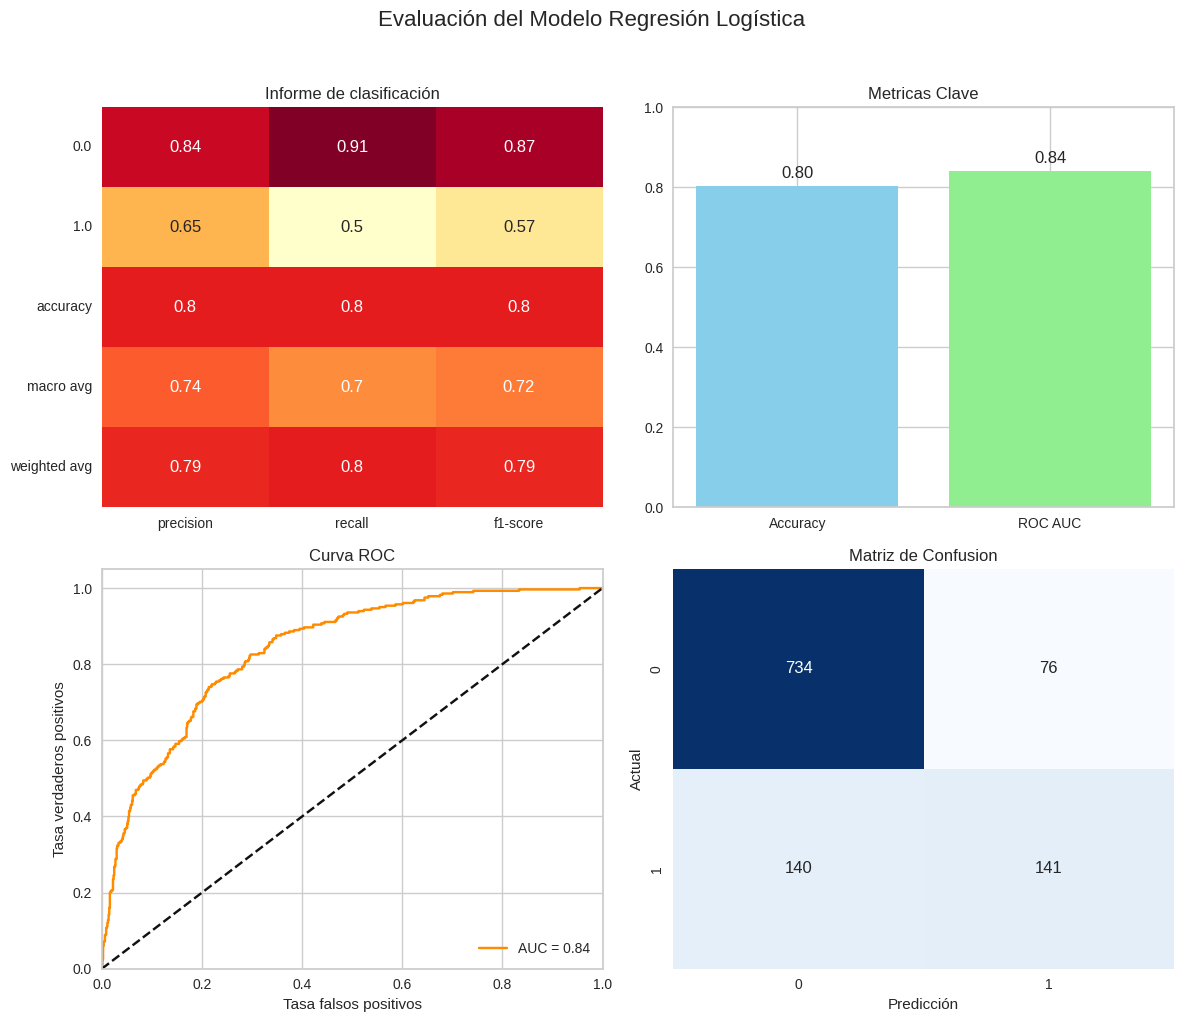

In [533]:
# Evaluación
reporte_gral('Regresión Logística',y_test,y_pred_lr,y_prob_lr,'8-evaluacion_LR')

### **Modelo Random Forest**

In [534]:
# Instanciar
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

In [535]:
# Entrenar
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [536]:
# Predicciones
y_pred_rf = random_forest.predict(X_test)
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

In [537]:
# Validar
resultados_cv_rf = cross_validate(random_forest, X_cv, y_cv, cv=cv_skf, scoring=['accuracy', 'roc_auc'])

resultados_cv = pd.concat([resultados_cv,(pd.DataFrame([{'Modelo': 'Random Forest',
                                        'Precisión_media': resultados_cv_rf['test_accuracy'].mean(),
                                        'Precisión_std': resultados_cv_rf['test_accuracy'].std(),
                                        'ROC_AUC_media': resultados_cv_rf['test_roc_auc'].mean(),
                                        'ROC_AUC_std': resultados_cv_rf['test_roc_auc'].std(),
                                        'Tiempo_ajuste': resultados_cv_rf['fit_time'].mean()}]))], ignore_index=True)
resultados_cv

,Modelo,Precisión_media,Precisión_std,ROC_AUC_media,ROC_AUC_std,Tiempo_ajuste
0,Decision Tree Classifier,0.756315,0.003001,0.733766,0.009919,0.017224
1,Regresión Logística,0.800677,0.008679,0.829352,0.008810,0.016890
2,Random Forest,0.776878,0.006574,0.792296,0.015991,0.561018


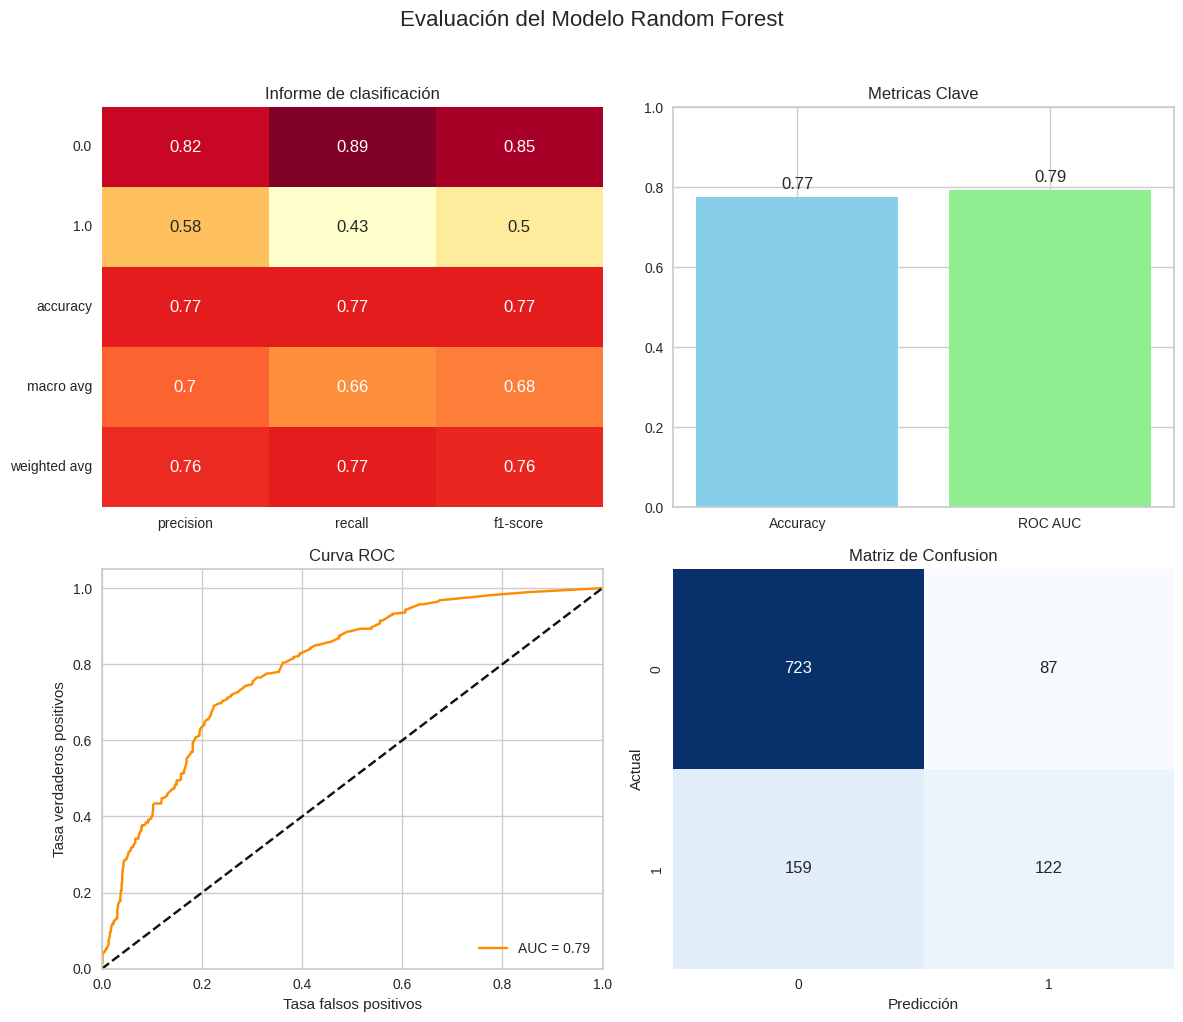

In [538]:
# Evaluación
reporte_gral('Random Forest',y_test,y_pred_rf,y_prob_rf,'9-evaluacion_RF')

### **Descripción rápida de Recall, Precisión y F1**

*   **Recall (Sensibilidad o TPR - True Positive Rate):**
    
    *   Mide la capacidad del modelo para detectar **todos los casos positivos relevantes**.
        
    *   Fórmula:
  $Recall=\frac{TP}{TP+FN}$​

    *   **Alto recall** = Menos falsos negativos (FN).
        
*   **Precisión:**
    
    *   Mide la **calidad de las predicciones positivas** del modelo (cuán seguros estamos cuando el modelo dice "positivo").
        
    *   Fórmula:
  $Presición=\frac{TP}{TP+FP}$​

    *   **Alta precisión** = Menos falsos positivos (FP).
        
*   **F1-Score:**
    
    *   Es la **media armónica** entre precisión y recall, útil cuando hay desbalance de clases.
        
    *   Fórmula:
  $F1=1*\frac{Precisión * Recall}{Precisión + Recall}$​
    *   **Equilibra precisión y recall**, penalizando modelos con uno muy bajo.

---

#### **Interrelaciones y Trade-offs**

🔹 **Recall vs. Precisión:** Generalmente hay un **trade-off**:

*   Aumentar el recall (capturar más positivos) suele aumentar los FP (baja precisión).
    
*   Aumentar la precisión (evitar FP) puede llevar a perder casos positivos (bajo recall).
    

🔹 **F1-Score** ayuda a evaluar el equilibrio, pero depende del problema:

*   Si **FN son costosos** (ej.: diagnóstico médico), priorizar **recall**.
    
*   Si **FP son costosos** (ej.: spam en correos), priorizar **precisión**.

---

#### **¿Cuándo priorizar Recall sobre Precisión?**

**Recall vs. Precisión**

|**Métrica**|**Foco**|**Fórmula**|**Importancia**|
| :-: | :-: | :-: | :-: |
|**Recall**|Minimizar falsos negativos (FN)|$\frac{TP}{TP+FN}$|Crítico cuando omitir un positivo es costoso (ej. salud, seguridad).|
|**Precisión**|Minimizar falsos positivos (FP)|$\frac{TP}{TP+FP}$​|Importante cuando los falsos positivos son problemáticos (ej. spam en correos).|

**Ejemplo:**
- **Modelo A:** Recall = 90%, Precisión = 50% → Detecta casi todos los positivos, pero muchos falsos positivos.
- **Modelo B:** Recall = 50%, Precisión = 90% → Detecta solo la mitad de los positivos, pero casi no tiene falsos positivos.

🔹 **¿Cuál elegir?** Depende del problema:

- Si es mejor **no dejar escapar ningún caso positivo** (ej. cáncer), prioriza **Recall**.
- Si es mejor **evitar falsas alarmas** (ej. spam), prioriza **Precisión**.

---

#### **Cómo mejorar el Recall (a costa de precisión)**

1.  **Ajustar el umbral de clasificación**:
    
    *   Reducir el threshold de probabilidad para predecir la clase positiva (ej.: de 0.5 a 0.3).
        
2.  **Usar modelos sensibles a FN**:
    
    *   SVM con kernel adecuado, Random Forest con class\_weight ajustado.
        
3.  **Métricas de evaluación alternativas**:
    
    *   Usar **ROC-AUC** (si el trade-off TPR vs. FPR es importante) o **Precisión-Recall Curve** (para clases desbalanceadas).
        
4.  **Balancear datos**:
    
    *   Oversampling de la clase minoritaria (SMOTE) o pérdidas ponderadas (ej.: `class_weight='balanced'` en sklearn).

---
#### **Resumen**

*   **Recall alto** = Minimizar FN (importante en problemas de salud/seguridad).
    
*   **Precisión alta** = Minimizar FP (importante en spam, recomendaciones).
    
*   **F1** = Balance entre ambos (ideal cuando no hay prioridad clara).
    

Si tu problema requiere **no dejar escapar casos positivos**, optimiza para recall, incluso si eso genera más falsas alarmas.

#📄**Informe Final** Telecom X - Parte 2

---
## 🔹 Resumen



El proyecto tiene como objetivo desarrollar modelos predictivos para identificar clientes con alta probabilidad de cancelar sus servicios en Telecom X. Utilizando técnicas de machine learning, se analizaron datos históricos de clientes para predecir el churn y proporcionar insights estratégicos. El proceso incluyó preparación de datos, análisis exploratorio, modelado y evaluación de desempeño.

---
## 🔹 Metodología

### 1\. **Preparación de Datos**

*   **Limpieza y Codificación**: Se eliminaron columnas irrelevantes (`id_cliente`, `cuentas_diarias`) y se aplicó One-Hot Encoding a variables categóricas (`genero`, `serv_internet`, `contrato`, `metodo_pago`).
    
*   **Balanceo de Clases**: Se evaluó el desbalance entre clases (25.7% cancelaciones vs. 74.3% no cancelaciones) y se probaron técnicas como SMOTE (oversampling) y NearMiss (undersampling).
    
*   **Normalización**: Se estandarizaron los datos para modelos sensibles a la escala (Regresión Logística) usando `StandardScaler` y `RobustScaler`.

### 2\. **Análisis Exploratorio (EDA)**

*   **Correlaciones**: Se identificaron variables con mayor correlación con el churn:
    
    *   Directa: `contrato_Mensual` (0.396), `serv_internet_Fibra optica` (0.301).
        
    *   Inversa: `antiguedad` (-0.344), `contrato_Bi-anual` (-0.295).
        
*   **Multicolinealidad**: Se calculó el VIF para detectar redundancias. Se eliminaron variables con VIF infinito (ej: `serv_internet_DSL`) y se corrigió la alta colinealidad entre `pago_mensual` y `pago_total`.
    

### 3\. **Modelado**

*   **Modelos Evaluados**:
    
    *   **Regresión Logística**: Mayor precisión (80.1%) y AUC-ROC (82.9%).
        
    *   **Random Forest**: Precisión del 77.9% y AUC-ROC del 79.2%.
        
    *   **Árbol de Decisión**: Precisión del 75.6% y AUC-ROC del 73.4%.
        
*   **Métricas Clave**: Se priorizó el AUC-ROC debido al desbalance de clases.
    

### 4\. **Evaluación**

*   **Regresión Logística** destacó por su equilibrio entre precisión y capacidad para generalizar, con un recall del 51% para la clase minoritaria (churn).

---
## 🔹 Resultados Clave

1.  **Factores Críticos para el Churn**:
    
    *   **Contrato Mensual**: Clients con contratos mensuales tienen mayor probabilidad de cancelar.
        
    *   **Antigüedad**: Clients con menos tiempo en la empresa son más propensos al churn.
        
    *   **Servicio de Fibra Óptica**: Correlacionado positivamente con cancelaciones, posiblemente por costos o competencia.
        
    *   **Métodos de Pago**: El uso de cheques electrónicos muestra correlación con el churn.
        
2.  **Desempeño de Modelos**:
    
    *   La Regresión Logística fue el modelo más efectivo, seguido por Random Forest. El Árbol de Decisión tuvo el menor rendimiento.


---
## 🔹 Conclusiones

El análisis revela que el churn en Telecom X está influenciado por factores contractuales, antigüedad del cliente y tipo de servicio. La Regresión Logística demostró ser la mejor opción para predecir cancelaciones, combinando robustez y interpretabilidad. Sin embargo, el recall moderado para la clase minoritaria sugiere oportunidades de mejora en la identificación de clientes en riesgo.

---
## 🔹 Recomendaciones Estratégicas


1.  **Enfoque en Contratos**:
    
    *   Promover contratos anuales o bi-anuales con incentivos (descuentos, beneficios exclusivos).
        
    *   Evitar cláusulas abusivas en contratos mensuales que aumenten la rotación.
        
2.  **Retención de Clientes Nuevos**:
    
    *   Implementar programas de onboarding para clientes con menos de 6 meses de antigüedad (ej: soporte prioritario, promociones temporales).
        
3.  **Servicio de Fibra Óptica**:
    
    *   Investigar causas detrás de la alta correlación con el churn (ej: fallas técnicas, precios) y mejorar la experiencia del usuario.
        
4.  **Optimización de Modelos**:
    
    *   Experimentar con técnicas avanzadas de balanceo (ej: SMOTE-NC) para mejorar el recall de la clase minoritaria.
        
    *   Probar modelos de ensamble (ej: XGBoost) para captar relaciones no lineales.
        
5.  **Monitoreo Continuo**:
    
    *   Actualizar periódicamente los modelos con nuevos datos para mantener su precisión.
        
    *   Establecer alertas tempranas para clientes con alto riesgo de churn basadas en los factores identificados.

---
## 🔹 Anexo Técnico

*   **Herramientas Utilizadas**: Python, Scikit-Learn, Pandas, Matplotlib/Seaborn.
    
*   **Repositorio del Proyecto**: [GitHub - Challenge Telecom X - Parte 2](https://github.com/freedox-cts/challenge-telecom-x_2).
    

Este informe proporciona una base sólida para reducir el churn y mejorar la retención de clientes en Telecom X, combinando insights accionables con soluciones técnicas.

# Informacion de Sesión

In [539]:
!pip install session-info
import session_info
session_info.show(html=False)

-----
imblearn            0.13.0
matplotlib          3.10.0
numpy               2.0.2
pandas              2.2.2
plotly              5.24.1
requests            2.32.3
seaborn             0.13.2
session_info        v1.0.1
sklearn             1.6.1
yellowbrick         1.5
-----
IPython             7.34.0
jupyter_client      6.1.12
jupyter_core        5.8.1
notebook            6.5.7
-----
Python 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Linux-6.1.123+-x86_64-with-glibc2.35
-----
Session information updated at 2025-08-15 20:17
